# PSD

A PSD plots signal power density as a function of frequency. You can think of it as the Fourier transform of the variance.

`scipy.signal.welch()` outputs PSD in units of $units^2/Hz$ and accel is typically $\mu g/\sqrt{Hz}$ and gyros are $dps/\sqrt{Hz}$, thus we will take the square root of `signal.welch()` to keep things in $units/\sqrt{Hz}$

- ref: [Measuring IMU Noise Density](https://mwrona.com/posts/imu-psd/)

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal
from pathlib import Path
import json

In [7]:
!ls ../../data/test

2023-08-27_16-02-12_test.json 2023-08-27_16-05-11_test.json
2023-08-27_16-03-18_test.json


In [24]:
p = Path("../../data/test/2023-08-27_16-05-11_test.json")
with p.open() as fd:
    data = json.load(fd)
print(data['info'])
print("----------------------------")
print(f"Found: {data['data'].keys()}")
print(f"IMU: {len(data['data']['imu'])} data points")

{'LSM6DSOX': {'accel': {'range': [-4, 4], 'units': 'g', 'cal': [[1.00268927, -0.00056029, -0.00190925, -0.00492348], [-0.00138898, 0.99580818, -0.00227335, 0.00503835], [-0.01438271, 0.00673172, 0.9998954, -0.01364759]]}, 'gyro': {'range': [-2000, 2000], 'units': 'rad/sec', 'cal': [-0.00889949, -0.00235061, -0.00475294]}}, 'LIS3MDL': {'range': [-4, 4], 'units': 'gauss', 'cal': {'bias': [-13.15340002, 29.7714855, 0.0645215], 'diag': [0.96545537, 0.94936676, 0.967698]}}, 'DPS390': {'units': ['C', 'Pa']}, 'Ultimate GPS v3': {'units': {'lat-lon': 'DD', 'altitude': 'm', 'hdop': 'm'}}, 'timestamp': '2023-08-27T16:05:11.855029'}
----------------------------
Found: dict_keys(['imu', 'gps'])
IMU: 319 data points


In [25]:
data['data']['imu'][0]

[0.0029296875,
 0.047607421875,
 1.020263671875,
 0.001065264455974102,
 -0.022370554506778717,
 -0.01065264455974102,
 -38.8629035949707,
 18.035661697387695,
 -52.85004425048828,
 26.902620315551758,
 103245.046875,
 775368]

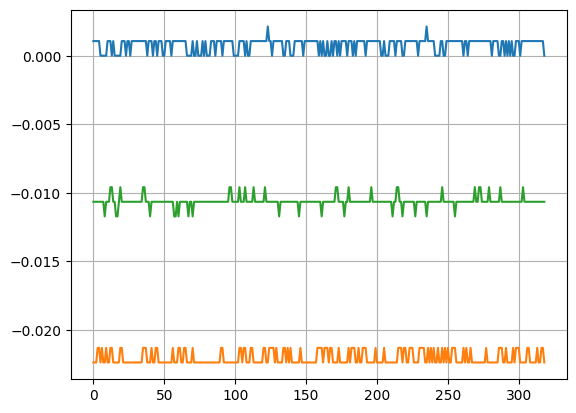

In [27]:
a = np.array([x[0:3] for x in data['data']['imu']])
g = np.array([x[3:6] for x in data['data']['imu']])
plt.plot(g)
plt.grid(True);

In [28]:
def plotfft(x, FS):
    N = len(x)  # Number of elements
    
    # Compute FFTs
    freqBins = np.linspace(0, FS / 2, N // 2)  # Freq. labels [Hz]
    fx = np.fft.fft(x)  # FFT of gyro data
    
    # Plot x-accel. FFT
    plt.figure()
    plt.plot(freqBins, (2 / N) * np.abs(fx[:N // 2]))
    plt.title('FFT of Data')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude')
    plt.grid()

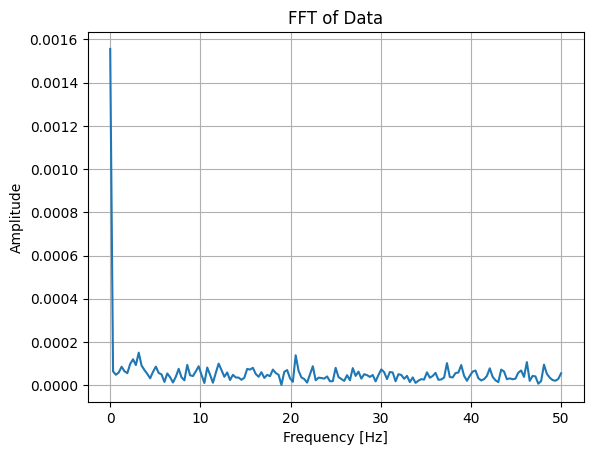

In [30]:
plotfft(g[:,0], 100)

## `signal.welch()`

AX Noise Density: 56.17847310583115 ug/sqrt(Hz)


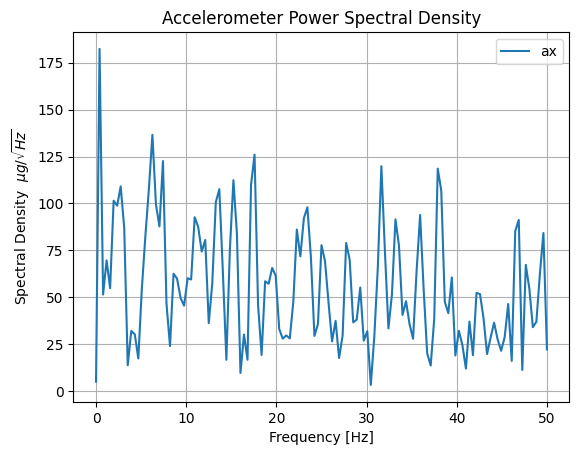

In [38]:
FS = 100
fx,px = signal.welch(a[:,2], FS, nperseg=256, scaling="density")
psdx = np.sqrt(px) * 1E6
nx = np.mean(psdx)
print(f'AX Noise Density: {nx} ug/sqrt(Hz)')


plt.plot(fx, psdx, label='ax')
plt.title('Accelerometer Power Spectral Density')
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'Spectral Density  $\mu g / \sqrt{Hz}$')
plt.legend()
plt.grid()